In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1. Data preparation and data cleaning


In [140]:
df = pd.read_csv("data/data.csv")
df.drop("LeadID", axis=1, inplace=True)
print(df.shape)

df.head().T

(100000, 18)


,0,1,2,3,4
Age,60,27,21,37,35
Gender,Female,Female,Female,Female,Male
Location,Faisalabad,Islamabad,Rawalpindi,Faisalabad,Karachi
LeadSource,Referral,Referral,Referral,Email,Referral
TimeSpent (minutes),30,28,45,45,31
PagesViewed,13,4,10,15,11
LeadStatus,Warm,Hot,Warm,Warm,Cold
EmailSent,1,7,9,5,2
DeviceType,Desktop,Desktop,Tablet,Desktop,Tablet
ReferralSource,Google,Direct,Direct,ReferralSite,Google


In [141]:
# clean column names
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.rename(columns={"conversion_(target)": "conversion"}, inplace=True)

In [142]:
# view data types
df.dtypes

age                        int64
gender                    object
location                  object
leadsource                object
timespent_(minutes)        int64
pagesviewed                int64
leadstatus                object
emailsent                  int64
devicetype                object
referralsource            object
formsubmissions            int64
downloads                  int64
ctr_productpage          float64
responsetime_(hours)       int64
followupemails             int64
socialmediaengagement      int64
paymenthistory            object
conversion                 int64
dtype: object

In [143]:
# clean categorical columns
cols_categorical = list(df.columns[df.dtypes == "object"])
print("Categorical:", cols_categorical)

for col in cols_categorical:
    df[col] = df[col].str.lower().str.replace(" ", "_")

# numerical columns    
cols_numerical = [
    'age', 'timespent_(minutes)', 'pagesviewed', 'emailsent', 'formsubmissions', 
    'downloads', 'ctr_productpage', 'responsetime_(hours)', 'followupemails', 'socialmediaengagement']
print("Numerial:", cols_numerical)

Categorical: ['gender', 'location', 'leadsource', 'leadstatus', 'devicetype', 'referralsource', 'paymenthistory']
Numerial: ['age', 'timespent_(minutes)', 'pagesviewed', 'emailsent', 'formsubmissions', 'downloads', 'ctr_productpage', 'responsetime_(hours)', 'followupemails', 'socialmediaengagement']


In [144]:
# check missing values
df.isnull().sum()

age                      0
gender                   0
location                 0
leadsource               0
timespent_(minutes)      0
pagesviewed              0
leadstatus               0
emailsent                0
devicetype               0
referralsource           0
formsubmissions          0
downloads                0
ctr_productpage          0
responsetime_(hours)     0
followupemails           0
socialmediaengagement    0
paymenthistory           0
conversion               0
dtype: int64

### Train / Test separation

- df_train to train different models
- df_val to select final model
- df_full_train to train the final model
- df_test to evalution the performance of the final model

In [145]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

print(len(df_train), len(df_val), len(df_test))

60000 20000 20000


In [146]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.conversion.values
y_val = df_val.conversion.values
y_test = df_test.conversion.values

del df_train['conversion']
del df_val['conversion']
del df_test['conversion']

## 2. EDA, feature importance analysis

`df_full_train` is used for EDAs

In [147]:
df_full_train = df_full_train.reset_index(drop=True)

df_full_train.isnull().sum()

age                      0
gender                   0
location                 0
leadsource               0
timespent_(minutes)      0
pagesviewed              0
leadstatus               0
emailsent                0
devicetype               0
referralsource           0
formsubmissions          0
downloads                0
ctr_productpage          0
responsetime_(hours)     0
followupemails           0
socialmediaengagement    0
paymenthistory           0
conversion               0
dtype: int64

In [148]:
df_full_train.conversion.value_counts(normalize=True)

conversion
0    0.98375
1    0.01625
Name: proportion, dtype: float64

In [149]:
df_full_train[cols_categorical].nunique()

gender             2
location          10
leadsource         4
leadstatus         3
devicetype         3
referralsource     5
paymenthistory     2
dtype: int64

### Feature importance: Conversion rate & Risk ratio

In [150]:
global_conversion = df_full_train.conversion.mean()

for c in cols_categorical:
    print(c)
    df_group = df_full_train.groupby(c).conversion.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_conversion
    df_group['risk'] = df_group['mean'] / global_conversion
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.015972,39944,-0.000278,0.982915
male,0.016527,40056,0.000277,1.017038




location


,mean,count,diff,risk
location,,,,
faisalabad,0.000000,8099,-0.016250,0.000000
gujranwala,0.000000,8054,-0.016250,0.000000
islamabad,0.055549,8011,0.039299,3.418377
karachi,0.053574,7989,0.037324,3.296841
lahore,0.052997,8057,0.036747,3.261378
multan,0.000000,7979,-0.016250,0.000000
peshawar,0.000000,8077,-0.016250,0.000000
quetta,0.000000,7886,-0.016250,0.000000
rawalpindi,0.000000,7885,-0.016250,0.000000




leadsource


,mean,count,diff,risk
leadsource,,,,
email,0.017578,19911,0.001328,1.081737
organic,0.016446,20248,0.000196,1.012066
referral,0.015409,19793,-0.000841,0.948276
social_media,0.015563,20048,-0.000687,0.957702




leadstatus


,mean,count,diff,risk
leadstatus,,,,
cold,0.009967,26789,-0.006283,0.613340
hot,0.028879,26628,0.012629,1.777192
warm,0.009931,26583,-0.006319,0.611148




devicetype


,mean,count,diff,risk
devicetype,,,,
desktop,0.017631,26658,0.001381,1.084968
mobile,0.014993,26946,-0.001257,0.922643
tablet,0.016139,26396,-0.000111,0.993157




referralsource


,mean,count,diff,risk
referralsource,,,,
direct,0.015691,15996,-0.000559,0.965626
facebook,0.017100,16023,0.000850,1.052333
google,0.015678,15882,-0.000572,0.964808
referralsite,0.016346,16090,0.000096,1.005880
twitter,0.016428,16009,0.000178,1.010970




paymenthistory


,mean,count,diff,risk
paymenthistory,,,,
good,0.015906,40049,-0.000344,0.978801
no_payment,0.016595,39951,0.000345,1.021251


### Feature importance: Mutual information

In [151]:
from sklearn.metrics import mutual_info_score

# for col in cols_categorical:
#     score = mutual_info_score(df_full_train[col], df_full_train["conversion"])
#     print(col, round(score, 2))
    
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.conversion)

mi = df_full_train[cols_categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

location          0.019844
leadstatus        0.002312
devicetype        0.000037
leadsource        0.000023
referralsource    0.000009
paymenthistory    0.000004
gender            0.000002
dtype: float64

### Feature importance: Correlation

In [152]:
df_full_train[cols_numerical].corrwith(df_full_train.conversion).abs().sort_values(ascending=False)

pagesviewed              0.161502
emailsent                0.066422
followupemails           0.047216
timespent_(minutes)      0.043234
age                      0.032999
ctr_productpage          0.003514
responsetime_(hours)     0.002809
formsubmissions          0.001210
socialmediaengagement    0.000112
downloads                0.000098
dtype: float64

## 3. Model selection process and parameter tuning

In [153]:
# one-hot encoding
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

train_dict = df_train[cols_categorical + cols_numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[cols_categorical + cols_numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [154]:
# get AUC score
from sklearn.metrics import roc_auc_score

def get_auc(model, X_val):
    y_pred = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    return auc

### Logistic Regression

In [155]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

/Users/hongyingyue/Git/ML-customer-conversion/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [156]:
get_auc(model, X_val)

0.9697507969415431

### Decision Tree

In [157]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

get_auc(dt, X_val)

0.9949664429530201

#### Parameter tuning
- selecting max_depth
- selecting min_samples_leaf

In [158]:
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))
                
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(4)

auc                
max_depth              4       5       6
min_samples_leaf                        
1                 0.9803  0.9887  0.9953
5                 0.9803  0.9887  0.9953
10                0.9803  0.9887  0.9953
15                0.9803  0.9887  0.9953
20                0.9803  0.9887  0.9953
100               0.9803  0.9887  0.9935
200               0.9790  0.9860  0.9885
500               0.9765  0.9811  0.9811

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

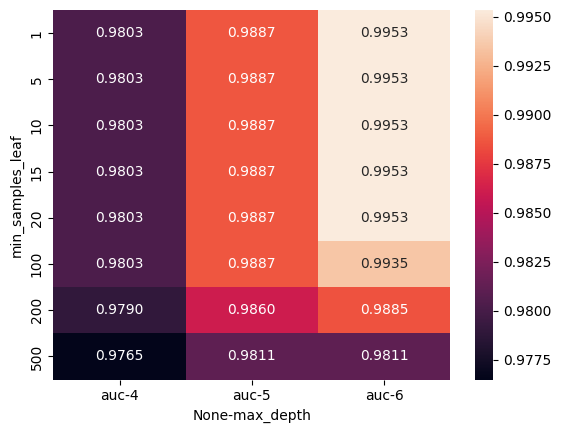

In [159]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".4f")

In [160]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)
dt.fit(X_train, y_train)

get_auc(dt, X_val)

0.9953412388208467

### Random Forest

#### Parameter tuning
- n_estimators
- max_depth
- min_samples_leaf

In [161]:
from sklearn.ensemble import RandomForestClassifier

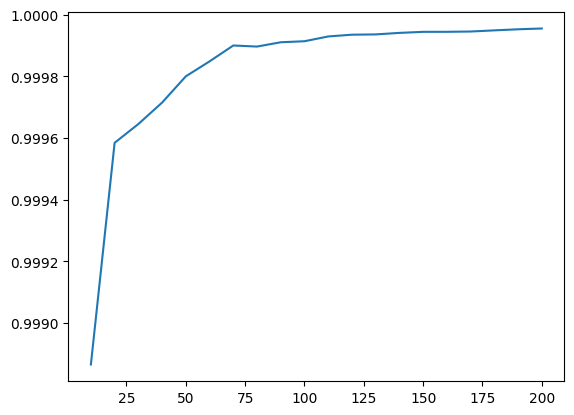

In [162]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))
    
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
plt.plot(df_scores.n_estimators, df_scores.auc)

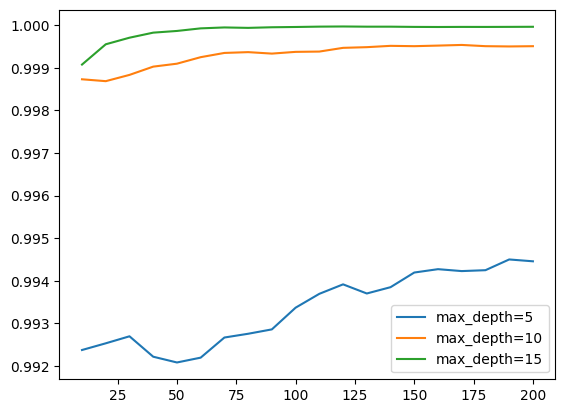

In [163]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))
        
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

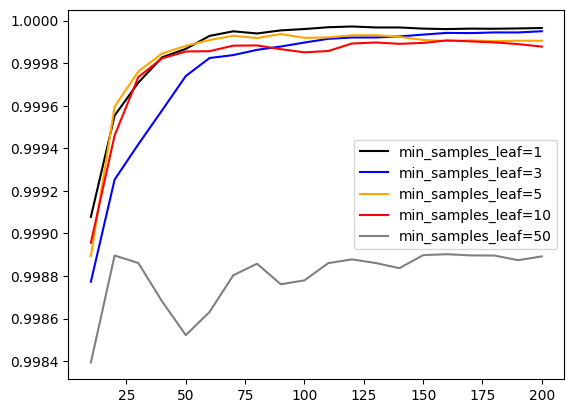

In [164]:
max_depth = 15

scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))
        
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [165]:
min_samples_leaf = 1

rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

get_auc(rf, X_val)

0.9999654244211912

### XGBoost

In [170]:
# !uv pip install xgboost

In [169]:
import xgboost as xgb

features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [171]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [ ]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [174]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [175]:
df_score = parse_xgb_output(output)

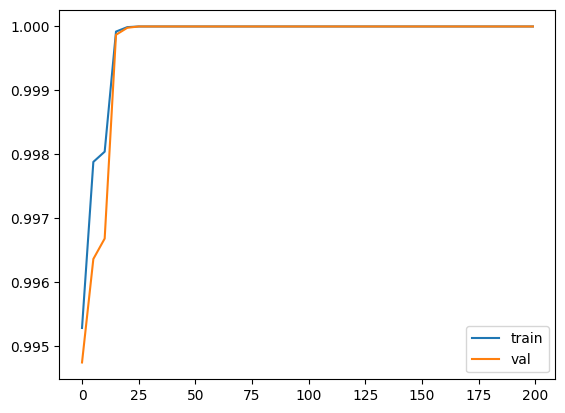

In [176]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

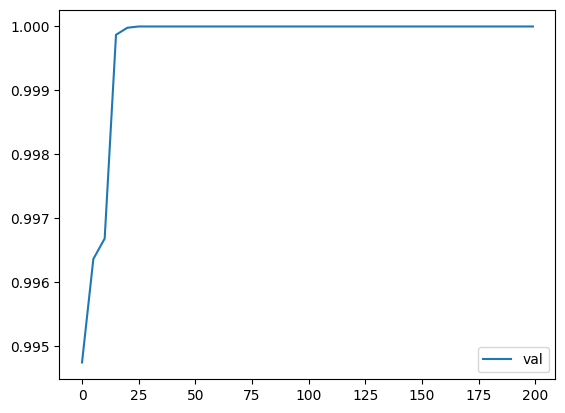

In [178]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [179]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.9999998296769517

#### Parameter tuning
- eta
- max_depth
- min_child_weight

In [189]:
scores = {}


**Run the following cells for eta = 0.01, 0.1, 0.3**

In [194]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=30,
                  verbose_eval=1,
                  evals=watchlist)

In [195]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

eta=0.01 0.99474
eta=0.1 0.99474
eta=0.3 0.9887


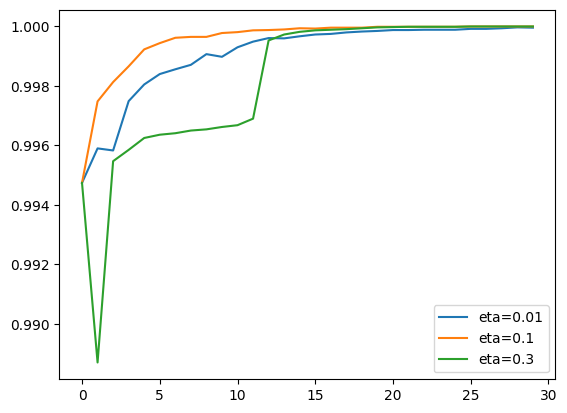

In [196]:
for eta, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
    print(eta, min(df_score['val_auc']))
plt.legend()

!!! Select eta = 0.1


In [197]:
scores = {}


**Run the following cells for max_depth = 3, 4, 6**

In [202]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=30,
                  verbose_eval=1,
                  evals=watchlist)

In [203]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=6'

max_depth=3 0.93927
max_depth=4 0.98026
max_depth=6 0.99474


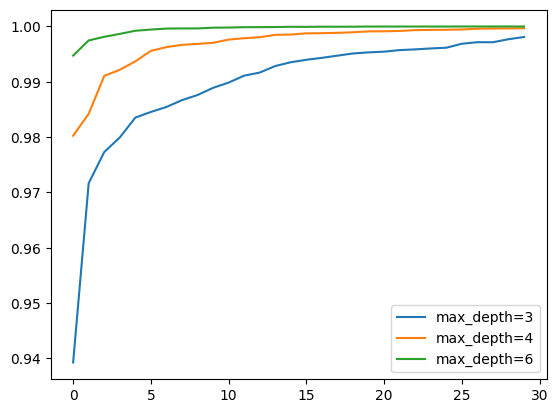

In [205]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
    print(max_depth, min(df_score['val_auc']))
plt.legend()

!!! Select max_depth = 6


In [206]:
scores = {}

**Run the following cells for min_child_weight = 1, 10, 30**

In [211]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=30,
                  verbose_eval=1,
                  evals=watchlist)

In [212]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

min_child_weight=1 0.99474
min_child_weight=10 0.9762
min_child_weight=30 0.94185


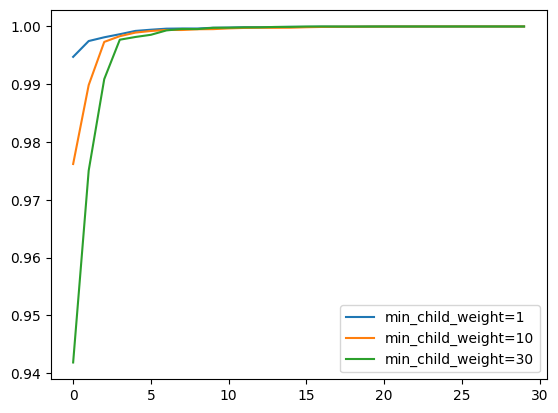

In [213]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
    print(min_child_weight, min(df_score['val_auc']))
plt.legend()

!!! Select min_child_weight = 1

In [215]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

xgboost = xgb.train(xgb_params, dtrain, num_boost_round=100)

y_pred = xgboost.predict(dval)
roc_auc_score(y_val, y_pred)

1.0